# Caracterización piezoelectricos

In [46]:
import urllib 
import cv2
import numpy as np 
import time 
import os
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
%matplotlib inline

## Primeras imágenes

En primer lugar se leen las imagenes tomadas en el laboratorio para poder hacer mediciones, se implementa el siguiente ciclo

In [6]:
datadir  = "images"
path = os.path.join(datadir)
im = []
for i in os.listdir(path):
    im.append(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE))

Se guardan las imagenes en escala de grises dentro de la variable **im**

In [7]:
np.shape(im)

(16, 722, 1280)

Veamos ahora todas las imagenes que se van a analizar 

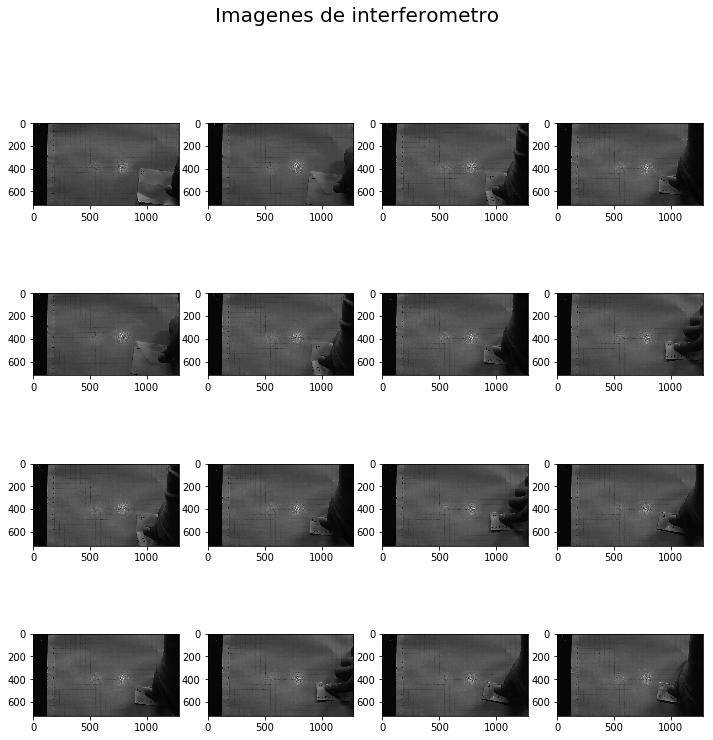

In [8]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Imagenes de interferometro',fontsize = "20")
#fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].imshow(im[x+y],cmap = "gray")
    

Para poder hacer el análisis del corriemiento se elije una linea en el píxel 400 para ver la intensidad que se tiene en el patrón de difracción 

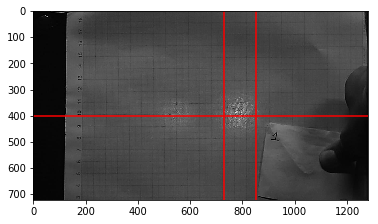

In [9]:
plt.imshow(im[1],cmap = "gray")
plt.axhline(y=400, color='r', linestyle='-')
plt.axvline(x=730, color='r', linestyle='-')
plt.axvline(x=850, color='r', linestyle='-')




Veamos entonces las intensidades sobre la línea del pixel 400 para cada una de las imagenes que se están analizando , entonces


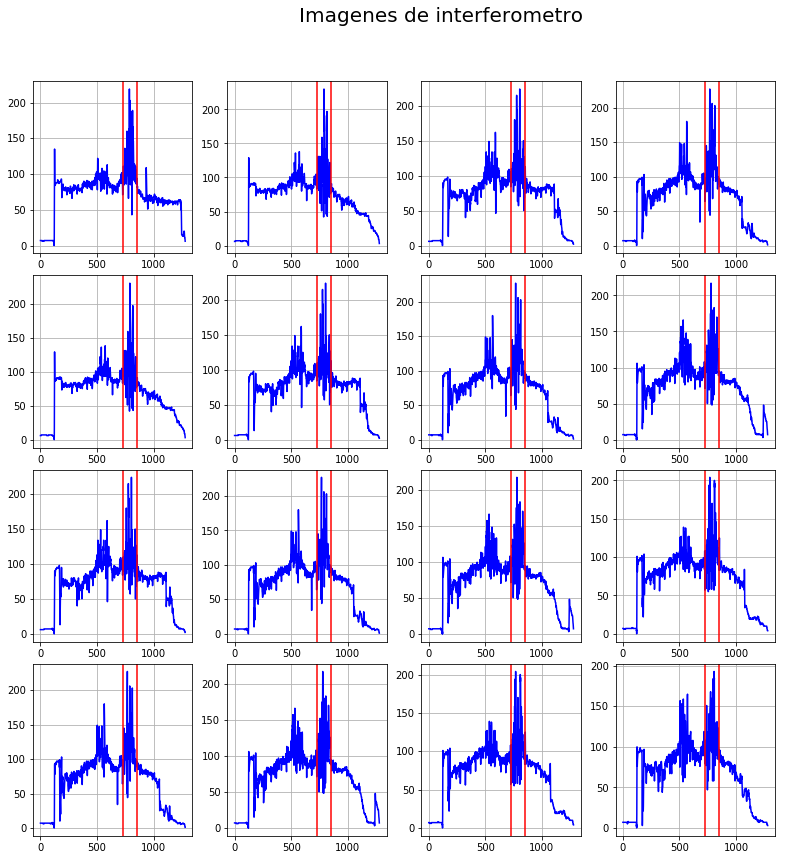

In [10]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Imagenes de interferometro',fontsize = "20")
fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].plot(im[x+y][400],"b-")
    ax[x,y].axvline(x=730, color='r', linestyle='-')
    ax[x,y].axvline(x=850, color='r', linestyle='-')
    ax[x,y].grid(True)
    #ax[x,y].set_xlim(730,850)

Ahora se hace la transofrmada rápida de Fourier de cada uno de los anteriores perfiles, los cuales deben coincidir.

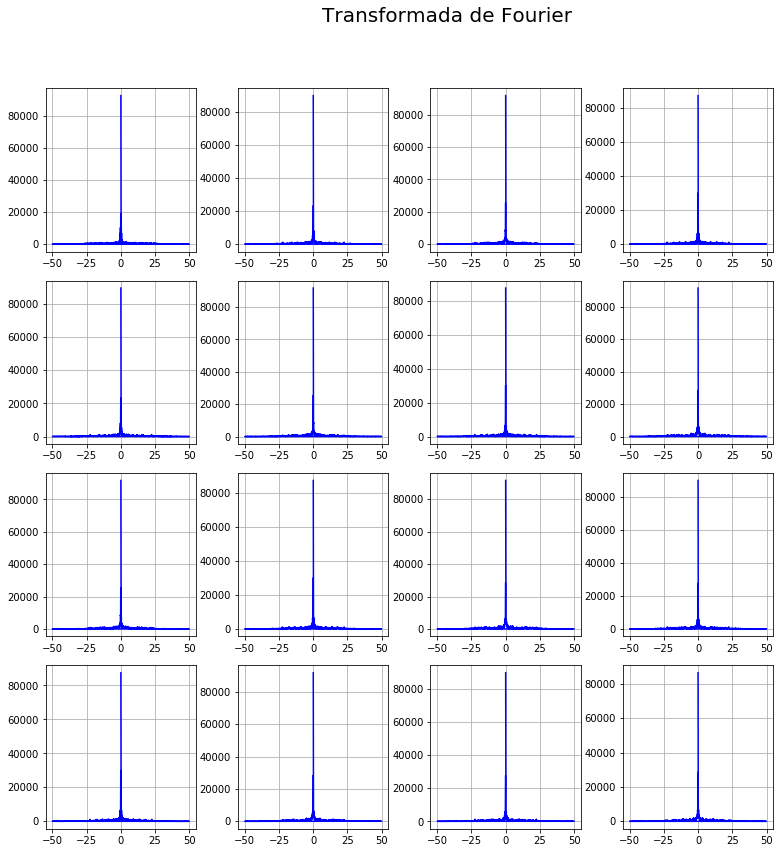

In [61]:
n = np.shape(im[0][400])
f = 100.
T = 1./f

xf =[]; yf = []
#plt.plot(im[4][400])
for i in range(len(im)):
    yf.append(fft(im[i][400]))
    xf.append(fftfreq(len(im[i][400])) * f)



fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Transformada de Fourier',fontsize = "20")
fig.tight_layout(pad = 0.8, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].plot(xf[x+y],np.abs(yf[x+y]),"b-")
    ax[x,y].grid(True)
    #ax[x,y].set_xlim(730,850)

La diferencia de fase en un interferometro de do haces está dada por 

$$\phi = 2\pi d \sigma \cos \alpha$$

En donde 

$$d : \text{Diferencia de camino óptico}$$

$$\alpha = \text{Ángulo entre la dirección del haz y el angulo de observación}$$

$$\sigma = \frac{1}{\lambda}: \text{Número de onda}$$

Por tanto la ecuación que se utiliza será

$$\boxed{\phi=\frac{2\pi d}{\lambda}}$$

En este caso se utiliza un laser rojo con longitud de onda $\lambda = (635 \pm xxx)nm$

Ahora, para extraer la fase de nuestors datos se utiliza la transformada de Fourier calculada anteriormente. Tenemos una relación útil que permite calcular facilmente la fase de la longitud seleccionada 

$$\phi = \tan^{-1}\left(\frac{Im(c(x,y))}{Re(c(x,y))})\right)$$

In [1]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = np.max(np.arctan(np.imag(yf[i])/np.real(yf[i])))

fase

NameError: name 'np' is not defined

In [60]:
fase-np.roll(fase,-1)

array([ 0.00563602, -0.00106356, -0.00454454,  0.00066713,  0.00027156,
        0.00576976, -0.00150529, -0.00484466, -0.00056485,  0.000148  ,
        0.00403439, -0.00292449,  0.0102259 , -0.01052013,  0.00302471,
       -0.00380993])

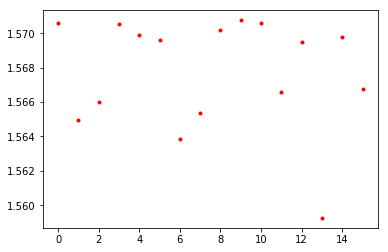

In [36]:
plt.plot(f,"r.")

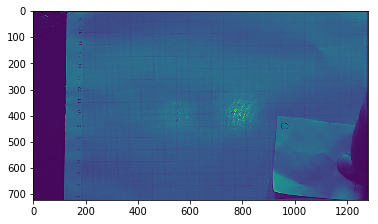

In [48]:
plt.imshow(im[0])

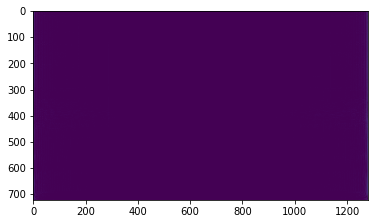

In [70]:
#plt.scatter(np.max(fftfreq(len(im[0]))*f),np.max(np.abs(fft(im[0]))), s=5, c='red', marker='o')
plt.imshow(np.abs(fft(im[0])))


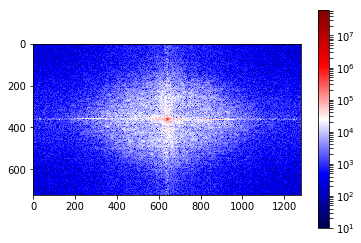

In [110]:
from matplotlib.colors import LogNorm
ftimage = np.fft.fft2(im[1])
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage),norm = LogNorm(vmin=10),cmap = "seismic")
plt.colorbar()

In [94]:
np.max(np.imag(ftimage))

3444258.430560664

In [97]:
print(np.max(np.arctan(np.imag(ftimage[0])/np.real(ftimage[0]))))



1.5690513723534174


In [111]:
n = np.shape(im[0])
f = 100.
T = 1./f
ftimage = []
for i in range(len(im)):
    x = np.fft.fft2(im[i])
    x = np.fft.fftshift(x)
    ftimage.append(x)


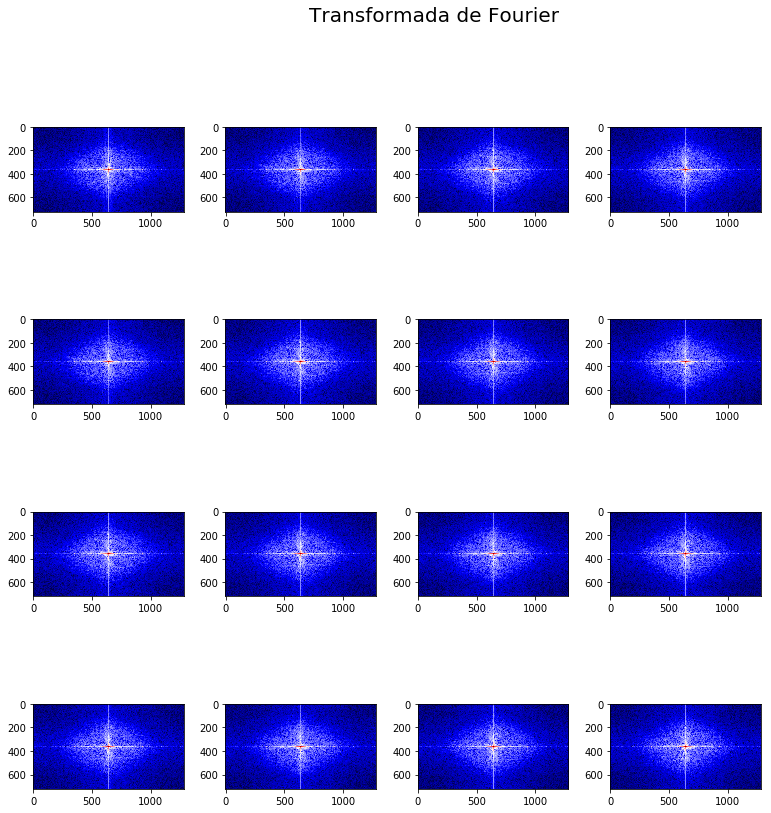

In [114]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Transformada de Fourier',fontsize = "20")
fig.tight_layout(pad = 0.8, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].imshow(np.abs(ftimage[x+y]),norm = LogNorm(vmin=100),cmap = "seismic")
    #ax[x,y].grid(True)

In [115]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = np.max(np.arctan(np.imag(ftimage[i])/np.real(ftimage[i])))

fase

array([1.57079209, 1.57079203, 1.57079624, 1.57079609, 1.57079136,
       1.57079583, 1.57079308, 1.57079524, 1.57079539, 1.57079313,
       1.57079616, 1.57079624, 1.57079564, 1.57079059, 1.57079507,
       1.57078529])

In [128]:
d = []
for i in range(1,len(fase)):
    d.append(fase[0]-fase[i])
    print(fase[0]-fase[i],i)
print (len(d))

6.108904360146994e-08 1
-4.15252631236207e-06 2
-4.006060714489834e-06 3
7.272805320202025e-07 4
-3.742972400244682e-06 5
-9.89187884048448e-07 6
-3.155068883042844e-06 7
-3.3035797861735716e-06 8
-1.041874855278735e-06 9
-4.073062272347272e-06 10
-4.148655145197466e-06 11
-3.5486126745976065e-06 12
1.493264093932467e-06 13
-2.984536394023962e-06 14
6.793191106524432e-06 15
15


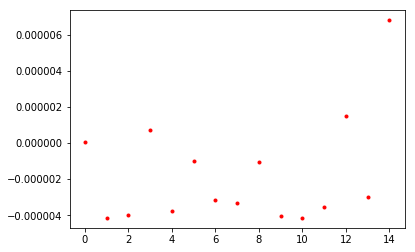

In [132]:
plt.plot(d,"r.")

# Análisis con imágenes de mayor resolución


In [3]:
datadir  = "images/"
categories = ["P1","P21","P22","P3"]
path = os.path.join(datadir)
im = []; piezoelectrico = []
for category in categories:
    path = os.path.join(datadir,category)
    clase = categories.index(category) + 1
    for i in os.listdir(path):
        im.append(cv2.imread(os.path.join(path,i),cv2.IMREAD_GRAYSCALE))
        piezoelectrico.append(clase)

In [5]:
print (np.shape(im),np.shape(piezoelectrico))

(84, 3456, 5184) (84,)


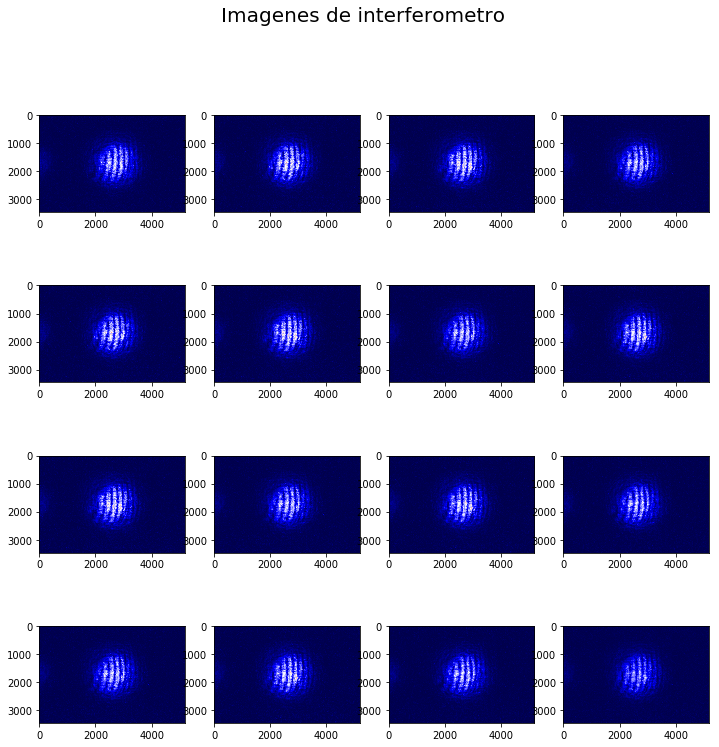

In [66]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
fig.suptitle('Imagenes de interferometro',fontsize = "20")
#fig.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
for x, y in [(i,j) for i in range(4) for j in range (4)]:
    ax[x,y].imshow(im[x+y],cmap = "seismic")

1728.0


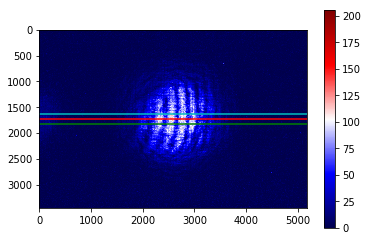

In [105]:
print(len(im[1])/2)
plt.imshow(im[1],cmap = "seismic")
plt.axhline(y=len(im[1])/2., color='r', linestyle='-')
plt.axhline(y=len(im[1])/2. + 100, color='g', linestyle='-')
plt.axhline(y=len(im[1])/2. - 100, color='c', linestyle='-')
plt.colorbar()

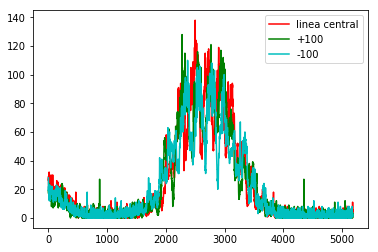

In [294]:
plt.plot(im[0][int(len(im[1])/2)],"r",label ="linea central")
plt.plot(im[1][int(len(im[1])/2)+100],"g",label ="+100")
plt.plot(im[1][int(len(im[1])/2)-100],"c",label = "-100")
plt.legend()


Ahora la transformada de Fourier de las tres señales anteriores

In [314]:
n = np.shape(im[0][400])
f = 50.
T = 1./f

xf =[]; yf = []
#plt.plot(im[4][400])
for i in range(len(im)):
    yf.append(fft(im[i][int(len(im[1])/2)]))
    xf.append(fftfreq(len(im[i][int(len(im[1])/2)])) * f)




(3715.0388657969806-7318.860544530867j)


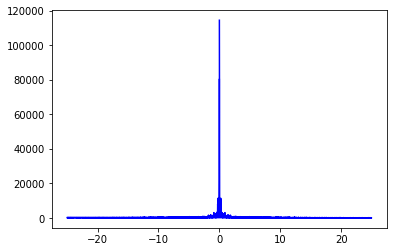

In [337]:
plt.plot(xf[0],np.abs(yf[0]),"b-")
print(yf[0][5])

In [340]:
fase = []
for i in range(len(yf)):
    py = yf[i]
    px = xf[i]
    Py = np.delete(py,[0,1,2,3,4,len(py)-1,len(py)-2,len(py)-3,len(py)-4],None)
    Px = np.delete(px,[0,1,2,3,4,len(py)-1,len(py)-2,len(py)-3,len(py)-4],None)
    Max = np.argmax(np.abs(Py))
    fase.append(np.arctan((np.imag(Py[Max]))/(np.real(Py[Max]))))


(-5, 5)

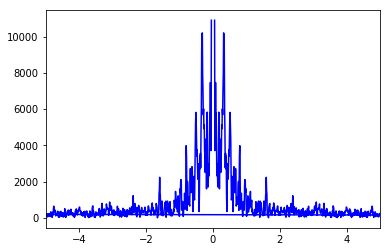

In [347]:
plt.plot(Px,np.abs(Py),"b-")
plt.xlim(-5,5)

In [342]:
def comparacion(f):
    d = [];f = np.array(f)
    for i in range(1,len(f)):
        d.append(f[0]-f[i])
    return d

p1 = fase[0:20]
p2 = fase[21:42]
p3 = fase[43:64]
p4 = fase[65:86]


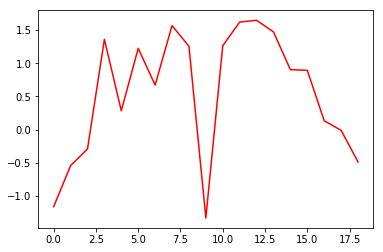

In [348]:
plt.plot(comparacion(p1),"r-")

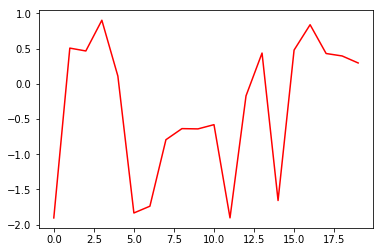

In [344]:
plt.plot(comparacion(p2),"r-")

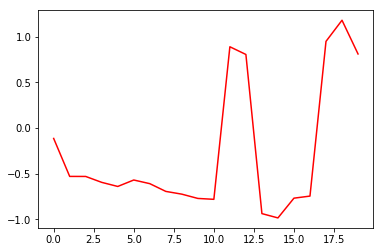

In [345]:
plt.plot(comparacion(p3),"r-")

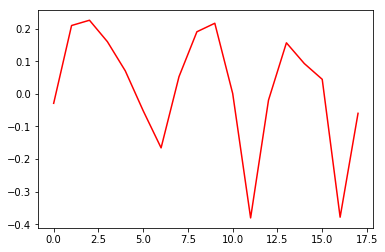

In [346]:
plt.plot(comparacion(p4),"r-")

máximo real transformada de Fourier -7033.816238552647 con indice 2
máximo imaginario transformada de Fourier 26236.337596582525 con indice 5180


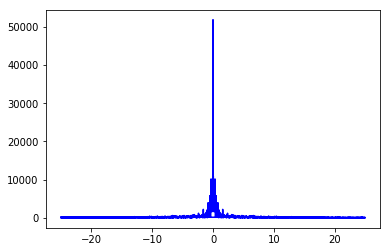

In [330]:
plt.plot(Px,np.abs(Py),"b-")
print ("máximo real transformada de Fourier",np.min(np.real(Py)),"con indice",np.argmin(np.real(Py)))
print ("máximo imaginario transformada de Fourier",np.max(np.imag(Py)),"con indice",np.argmax(np.imag(Py)))



In [215]:
np.max(Px)

24.990354938271604

In [178]:
-1500 > -1000

False

Text(0.5,1,'Axis [1,1]')

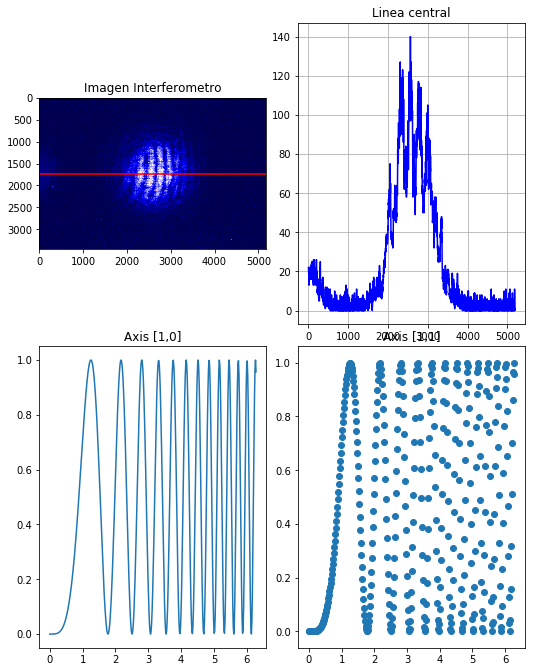

In [93]:
f, axarr = plt.subplots(2, 2,figsize = (8, 10))
f.tight_layout(pad = 0.1, rect = [0, 0, 0.9, 0.9])
axarr[0, 0].imshow(im[1],cmap = "seismic")
axarr[0, 0].axhline(y=len(im[1])/2., color='r', linestyle='-')
axarr[0, 0].set_title('Imagen Interferometro')
axarr[0, 1].plot(im[1][1720],"b-")
axarr[0, 1].grid(True)

axarr[0, 1].set_title('Linea central')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)


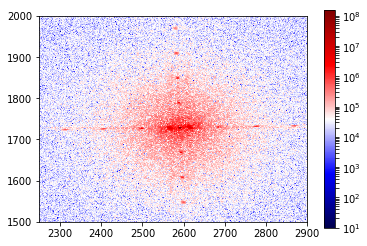

In [45]:
from matplotlib.colors import LogNorm
ftimage = np.fft.fft2(im[0])
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage),norm = LogNorm(vmin=10),cmap = "seismic")
plt.xlim(2250,2900)
plt.ylim(1500,2000)
plt.colorbar()

##### np.max(ftimage)

In [13]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = np.max(np.arctan(np.imag(ftimage[i])/np.real(ftimage[i])))

fase

array([1.56933864, 1.5701196 , 1.57067921, 1.57039694, 1.57074965,
       1.57077243, 1.57065822, 1.56939523, 1.56873837, 1.56950428,
       1.57056062, 1.57020636, 1.56971082, 1.57076652, 1.57079604,
       1.56997963, 1.5705095 , 1.57019691, 1.57008161, 1.56920749,
       1.57045167, 1.57034922, 1.56980196, 1.57060451, 1.57070208,
       1.56803826, 1.57019878, 1.57018617, 1.56962107, 1.57060485,
       1.57054388, 1.57031672, 1.56676717, 1.57026842, 1.57015933,
       1.57032016, 1.57078439, 1.57075329, 1.57073663, 1.56944078,
       1.57077148, 1.57007716, 1.57075193, 1.57053787, 1.57029443,
       1.5698503 , 1.57069135, 1.5701245 , 1.57044212, 1.56987201,
       1.56980283, 1.56974342, 1.57060992, 1.57066361, 1.57041971,
       1.57067588, 1.57070067, 1.57040479, 1.57054346, 1.56822909,
       1.5707507 , 1.56992253, 1.5707587 , 1.57053247, 1.57055205,
       1.5707061 , 1.57008917, 1.57076734, 1.56893175, 1.57053628,
       1.56994324, 1.57050307, 1.57063836, 1.57024761, 1.57079

In [17]:
d = []
for i in range(1,len(fase)):
    d.append(fase[0]-fase[i])
    print(fase[0]-fase[i],i)


-0.0007809594599914593 1
-0.0013405713285352672 2
-0.0010583004697821696 3
-0.0014110147211876534 4
-0.0014337901015033516 5
-0.001319581298937722 6
-5.6591285616081066e-05 7
0.0006002685387620499 8
-0.00016563846599426668 9
-0.001221976271202685 10
-0.0008677186153165373 11
-0.0003721803121594647 12
-0.0014278786227546192 13
-0.0014574055081761905 14
-0.0006409905078195166 15
-0.0011708655566988746 16
-0.000858266151745557 17
-0.0007429694070253401 18
0.00013115067118474322 19
-0.001113030282839933 20
-0.001010583448115776 21
-0.0004633257847164174 22
-0.0012658713335707006 23
-0.0013634453228332788 24
0.0013003810873024602 25
-0.0008601405715944477 26
-0.000847535508658126 27
-0.0002824330357609206 28
-0.0012662063680997093 29
-0.0012052433594300638 30
-0.0009780828957652865 31
0.002571473650884837 32
-0.0009297785018682614 33
-0.0008206868643407805 34
-0.000981519143629983 35
-0.0014457527615354682 36
-0.0014146518467392788 37
-0.001397989860072002 38
-0.00010213659841507017 39
-0.0

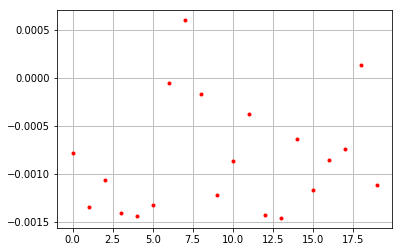

In [21]:
plt.plot(d[0:20],"r.")
plt.grid(True)

In [22]:
fase = np.zeros(len(im))
for i in range(len(im)):
    fase[i] = (np.arctan(np.max(np.imag(ftimage[i]))/np.max(np.real(ftimage[i]))))

fase

array([0.2082956 , 0.36115347, 0.6492558 , 0.68812275, 0.66451364,
       0.72545866, 1.0055208 , 0.79932997, 0.83654056, 0.77570077,
       0.69942752, 0.73087653, 0.66018828, 0.74785123, 0.71511097,
       0.76577892, 0.76635637, 0.76060711, 0.69239162, 0.69642838,
       0.78547767, 0.82185703, 0.85816317, 0.82681619, 0.75959984,
       0.64900672, 0.74747459, 0.86278287, 0.7713733 , 0.68655787,
       0.78670065, 0.70906119, 0.64839659, 0.74485069, 0.93113029,
       0.62023372, 0.85080648, 0.74214825, 0.64664879, 0.70176532,
       0.69719522, 0.74303062, 0.67109108, 0.86282101, 0.73332418,
       0.80736328, 0.82033534, 0.79820641, 0.7912669 , 0.63723995,
       0.83103521, 0.80259157, 0.9029064 , 0.72161191, 0.66594007,
       0.73669478, 0.8385627 , 0.68742631, 0.73634063, 0.75349756,
       0.75774122, 0.89732413, 0.89122107, 0.86296843, 0.77202235,
       0.81776294, 0.7224401 , 0.85973987, 0.71987115, 0.77684935,
       0.72940653, 0.76820975, 0.93282136, 0.7307951 , 0.66961

In [23]:
d = []
for i in range(1,len(fase)):
    d.append(fase[0]-fase[i])
    print(fase[0]-fase[i],i)

-0.15285787121075092 1
-0.44096020001173286 2
-0.47982714754841693 3
-0.456218042003968 4
-0.5171630606326614 5
-0.7972252023770925 6
-0.5910343712688997 7
-0.6282449606667262 8
-0.5674051651737112 9
-0.4911319187509058 10
-0.522580925309272 11
-0.45189267708921277 12
-0.5395556302258547 13
-0.506815365144154 14
-0.5574833161336256 15
-0.5580607687134428 16
-0.5523115104981011 17
-0.4840960179417573 18
-0.48813278147485495 19
-0.577182064195987 20
-0.6135614304308201 21
-0.649867567333255 22
-0.6185205849509303 23
-0.5513042368908313 24
-0.4407111235251163 25
-0.539178984675396 26
-0.6544872717865079 27
-0.5630777027948706 28
-0.47826226968887775 29
-0.5784050476941383 30
-0.5007655881105572 31
-0.44010099262669067 32
-0.5365550893650856 33
-0.7228346870217758 34
-0.41193812062955193 35
-0.6425108833088577 36
-0.5338526487434276 37
-0.43835319287091856 38
-0.49346971910593485 39
-0.48889962174370183 40
-0.5347350220177817 41
-0.4627954779162521 42
-0.6545254101497407 43
-0.525028578985

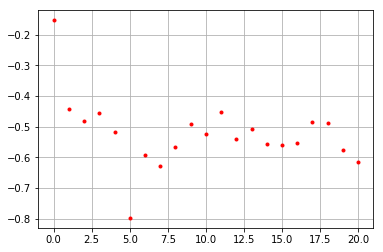

In [32]:
plt.plot(d[0:21],"r.")
plt.grid(True)

In [36]:
print(3*np.std(d[0:21]),np.mean(d[0:21]))

0.33809408651664524 -0.5225590679429499


In [38]:
print (np.mean(d[0:21])+2*np.std(d[0:21]),np.mean(d[0:21])-2*np.std(d[0:21]))

-0.29716301026518643 -0.7479551256207134
